In [1]:
import os
os.chdir("D:\\computer_vision")
#%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import the necessary packages specific to Computer vision
import cv2

In [2]:
seed_value = 123; np.random.seed(seed_value);
exec(open(os.path.abspath('image_common_utils.py')).read())

In [3]:
from skimage.io import imread

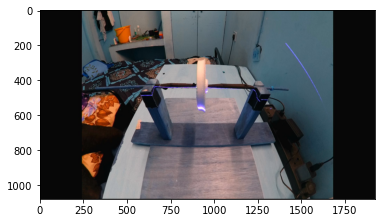

In [4]:
img=cv2.imread("./image_data/laser2.jpg")
#img=cv2.resize(img,(1000,1000))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

In [5]:
cv2.imshow('img',gray); cv2.waitKey(0); cv2.destroyAllWindows()
print(np.shape(gray))

(1080, 1920)


In [7]:
img_copy=np.copy(gray)
for j in range(0,1920):
    for i in range(0,1080):
        if(img_copy[i,j]<238):
            img_copy[i,j]=0
        else:
            img_copy[i,j]=1

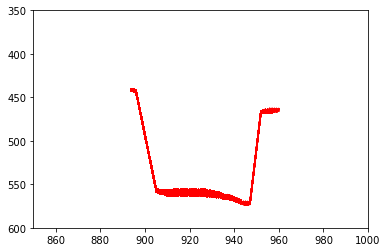

In [10]:
from PIL import Image
#img = Image.open("./image_data/balloon.jpg")

#width, height = img.size[:2]
px = np.array(img_copy)
m=[]
n=[]
for j in range(1,1920):
    for i in range(1,1080):
        if(px[i,j]==1):
            a=i
            b=j
            X=np.asarray([b])
            Y=np.asarray([a])
            m.append(X)
            n.append(Y)
            #print(i,j,px[i,j])
            plt.xlim(850, 1000)
            plt.ylim(600,350)
            plt.plot(m,n,color="red")
            #plt.ylim(max(m),min(m))
#for inp in m:
    #print(m)

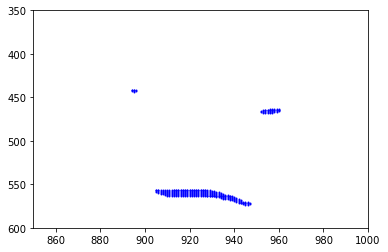

In [11]:
plt.xlim(850, 1000)
plt.ylim(600,350)
plt.scatter(m,n,color="blue",s=0.9)

In [12]:
t=65*(np.pi/180)

In [13]:
print(type(m))
print(np.shape(m))

<class 'list'>
(334, 1)


In [14]:
m1=np.array(m)
n1=np.array(n)
z1=n1*np.tan(t)

In [15]:
print(type(z1))
print(np.shape(z1))

<class 'numpy.ndarray'>
(334, 1)


In [16]:
A1=np.hstack([m1,n1,z1])
B1=A1.T

In [17]:
print(np.shape(A1))
print(np.shape(B1))

(334, 3)
(3, 334)


In [18]:
x=B1[0,:]
y=B1[1,:]
z=B1[2,:]

In [19]:
print(np.shape(x))
print(type(x))

(334,)
<class 'numpy.ndarray'>


Text(0, 0.5, 'y')

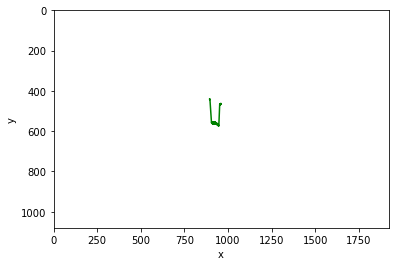

In [20]:
plt.xlim(0 , 1920)
plt.ylim(1080,0)
plt.plot(x,y,color='green')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'z')

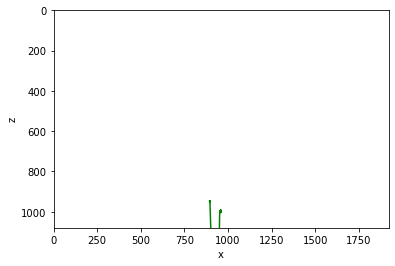

In [21]:
plt.xlim(0 , 1920)
plt.ylim(1080,0)
plt.plot(x,z,color='green')
plt.xlabel('x')
plt.ylabel('z')

Text(0, 0.5, 'z')

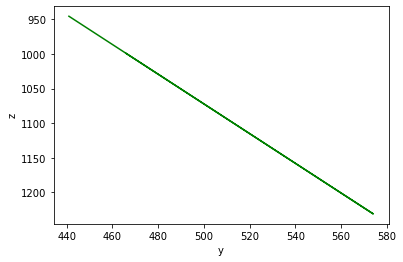

In [22]:
plt.xlim(0 , 1920)
plt.ylim(1080,0)
plt.plot(y,z,color='green')
plt.autoscale()
plt.xlabel('y')
plt.ylabel('z')

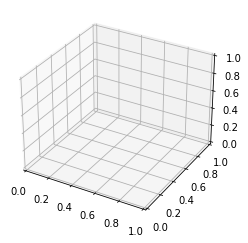

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection ='3d')

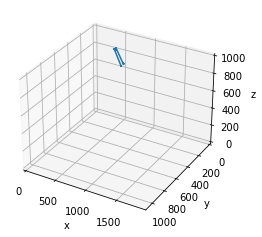

(334,)


numpy.ndarray

In [24]:
import numpy as np

x=B1[0,:]
y=B1[1,:]
z=B1[2,:]

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(0,1920)
ax.set_ylim(1080,0)
ax.set_zlim(0,1000)
ax.plot3D(x,y,z)
ax.set_xlabel("x")

ax.set_ylabel("y")

ax.set_zlabel("z")
plt.show()
print(np.shape(y))
type(x)

In [25]:
T_1=([[1,0,0],[0, np.cos(t), -np.sin(t)],[0,np.sin(t),np.cos(t)]])
#T=([[0,1,0],[np.cos(t),0,np.sin(t)],[-np.sin(t),0,np.cos(t)]])
T_2=np.linalg.inv(T_1)
a=np.matmul(T_2,B1)

In [26]:
xn=a[0,:]
yn=a[1,:]
zn=a[2,:]

Text(0, 0.5, 'y')

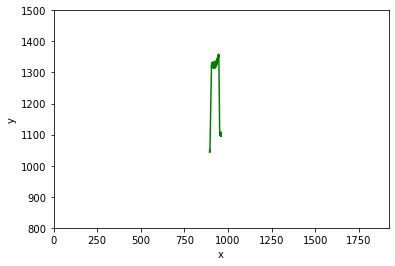

In [28]:
plt.xlim(0 , 1920)
plt.ylim(800,1500)
plt.plot(xn,yn,color='green')
plt.xlabel('x')
plt.ylabel('y')

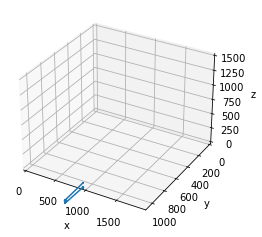

In [30]:
import numpy as np

xn=a[0,:]
yn=a[1,:]
zn=a[2,:]

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(0,1920)
ax.set_ylim(1080,0)
ax.set_zlim(0,1500)
ax.plot3D(xn,yn,zn)
#ax.view_init(120, 30)
ax.set_xlabel("x")

ax.set_ylabel("y")

ax.set_zlabel("z")
plt.show()

In [31]:
import numpy as np

xn=a[0,:]
yn=a[1,:]
zn=a[2,:]

surf = ax.plot_surface(xn, yn, zn, linewidth=0, antialiased=False)

ValueError: Argument Z must be 2-dimensional.